# Algorithm's Basics

- **Created by Andrés Segura Tinoco**
- **Created on Dec 18, 2019**

In [1]:
# Load the Python libraries
import numpy as np
import math
from scipy import stats
import timeit

In [2]:
# Load plotting libraries
import matplotlib.pyplot as plt

## 1. Greatest Common Divisor (GCD)

In [3]:
# Example values
m = 12000000
n = 76000000

A simple approach:

In [4]:
# Function that returns the GCD of two values (intuitive algorithn)
def gcd_simple(m, n):
    i = min(m, n) + 1
    
    while (m % i != 0) or (n % i != 0):
        i -= 1
        
    return i

In [5]:
start_time = timeit.default_timer()
print(gcd_simple(m, n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

4000000
>> elapsed time 1122.0183000000002 ms


An enhanced approach:

In [6]:
# Function that returns the GCD of two values (euclidean algorithm)
def gcd_euclidean(m, n):
    
    while m > 0:
        t = m
        m = n % m
        n = t
    
    return n

In [7]:
start_time = timeit.default_timer()
print(gcd_euclidean(m, n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

4000000
>> elapsed time 2.458999999999989 ms


## 2. Fibonacci Serie

In [8]:
# Example value
n = 35

A recursive algorithm:

In [9]:
# Function that returns the n-fibonacci value (recursive algorithm)
def fibo_rec(n):
    if n < 2:
        return n
    else:
        return fibo_rec(n - 1) + fibo_rec(n - 2)

In [10]:
start_time = timeit.default_timer()
print(fibo_rec(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 6616.6331 ms


An iterative algorithm:

In [11]:
# Function that returns the n-fibonacci value (iterative algorithm)
def fibo_iter(n):
    i, j = 1, 0
    
    for k in range(n):
        j = i + j
        i = j - i
    
    return j

In [12]:
start_time = timeit.default_timer()
print(fibo_iter(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 1.0494999999997034 ms


An approximation approach:

$$ f_{n} = {\frac{1}{\sqrt{5}}}{[\phi^n -(-\phi)^{-n}]} \tag{1}, $$
$$ \phi = (1 + \sqrt{5})\,/\,2 $$

In [13]:
# Function that returns the n-fibonacci value (De Moivre equation)
def fibo_de_moivre(n):
    golden_ratio = (1 + 5**(1/2)) / 2
    f = (golden_ratio**n - (-golden_ratio)**(-n)) / 5**(1/2)
    return int(f)

In [14]:
start_time = timeit.default_timer()
print(fibo_de_moivre(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

9227465
>> elapsed time 0.36670000000071923 ms


## 3. Integer Factorization

In [15]:
# Example values
a, b = 104723, 104729
n = a * b
n

10967535067

In [16]:
# Function that returns the factorization of an integer (ascending approach)
def fact_int(n):
    nn = n**(1/2)
    m = 2
    
    while m < nn:
        if n % m == 0:
            return (m, n // m)
        m += 1
    
    return (1, n)

In [17]:
start_time = timeit.default_timer()
print(fact_int(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

(104723, 104729)
>> elapsed time 34.73229999999994 ms


In [18]:
# Function that returns the factorization of an integer (descending approach)
def fact_int_2(n):
    nn = n**(1/2)
    m = int(nn)
    
    while m > 1:
        if n % m == 0:
            return (m, n // m)
        m -= 1
    
    return (1, n)

In [19]:
start_time = timeit.default_timer()
print(fact_int_2(n))
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

(104723, 104729)
>> elapsed time 1.3318999999984982 ms


## 4. Tower of Hanoi

In [20]:
# Move n disk from source to destination
def hanoi_rec(n, source, inter, dest):
    if n == 1:
        print('Move from:', source, ', to:', dest)
        return
    else:
        hanoi_rec(n - 1, source, dest, inter)
        print('Move from:', source, ', to:', dest)
        hanoi_rec(n - 1, inter, source, dest)

In [21]:
start_time = timeit.default_timer()
n_disks = 5
hanoi_rec(n_disks, 'T1', 'T2', 'T3')
print('>> elapsed time', (timeit.default_timer() - start_time) * 1000, 'ms')

Move from: T1 , to: T3
Move from: T1 , to: T2
Move from: T3 , to: T2
Move from: T1 , to: T3
Move from: T2 , to: T1
Move from: T2 , to: T3
Move from: T1 , to: T3
Move from: T1 , to: T2
Move from: T3 , to: T2
Move from: T3 , to: T1
Move from: T2 , to: T1
Move from: T3 , to: T2
Move from: T1 , to: T3
Move from: T1 , to: T2
Move from: T3 , to: T2
Move from: T1 , to: T3
Move from: T2 , to: T1
Move from: T2 , to: T3
Move from: T1 , to: T3
Move from: T2 , to: T1
Move from: T3 , to: T2
Move from: T3 , to: T1
Move from: T2 , to: T1
Move from: T2 , to: T3
Move from: T1 , to: T3
Move from: T1 , to: T2
Move from: T3 , to: T2
Move from: T1 , to: T3
Move from: T2 , to: T1
Move from: T2 , to: T3
Move from: T1 , to: T3
>> elapsed time 13.458100000001139 ms


## 5. Changing Distribution

Creating a toy uniform distribution:

In [22]:
# Initialize variables
n = 256
data_raw = [25] * n
total = sum(data_raw)
print('Total values:', total)

Total values: 6400


In [23]:
# Creating target distribution
alpha = 0.02
t_func = stats.norm(n/2, alpha*n)
x = np.linspace(0, n, n)
y = t_func.pdf(x) * total

In [24]:
# Create pretty x axis labels
def get_x_labels(n):
    x_labels = []
    for ix in range(n):
        if ix % 10 == 0:
            x_labels.append(str(ix))
        else:
            x_labels.append('')
    return x_labels

In [25]:
# Function that plots a symbol distribution
def plot_symbol_dist(data, x, y):
    
    # Prepare data
    n = len(data)
    y_pos = np.arange(n)
    symbols = get_x_labels(n)
    
    # Plot distribution
    plt.figure(figsize = (12, 5))
    plt.plot(x, y, '-', color = '#ff7f0e', lw = 3, label = 'Real distribution')
    plt.bar(y_pos, data, align='center', alpha=0.5)
    plt.xticks(y_pos, symbols, fontsize = 10, rotation = 50)
    plt.ylabel('Value')
    plt.title('Distribution')
    plt.show()

In [26]:
# Function that calculates the new distribution
def get_new_dist(data_raw, y):
    a = []
    b = []
    n = len(data_raw)
    
    carry = 0
    for i in range(n // 2):
        y1 = data_raw[i] + carry
        y2 = max(math.floor(y[i]), 1)
        y_new = min(y1, y2)
        a.append(y_new)
        carry = y1 - y_new
    print('Forward carry:', carry)
    
    for i in range(n - 1, n // 2 - 1, -1):
        y1 = data_raw[i] + carry
        y2 = max(math.floor(y[i]), 1)
        y_new = min(y1, y2)
        b.append(y_new)
        carry = y1 - y_new    
    print('backward carry:', carry)
    
    # Concatenate arrays
    data_new = a + b[::-1]
    return data_new

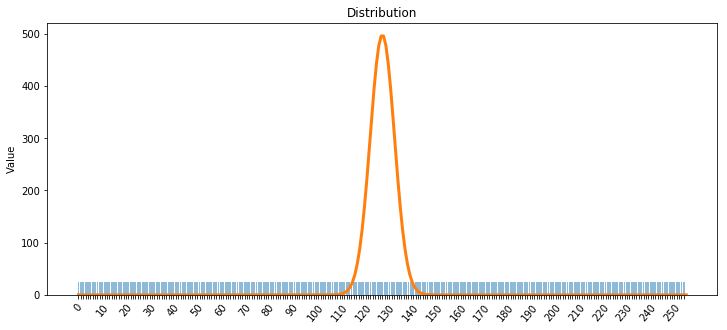

In [27]:
# Plot current distribution
plot_symbol_dist(data_raw, x, y)

Calculate and plot new distribution (Normal):

In [28]:
data_new = get_new_dist(data_raw, y)
print('n temp:', len(data_new))

Forward carry: 0
backward carry: 0
n temp: 256


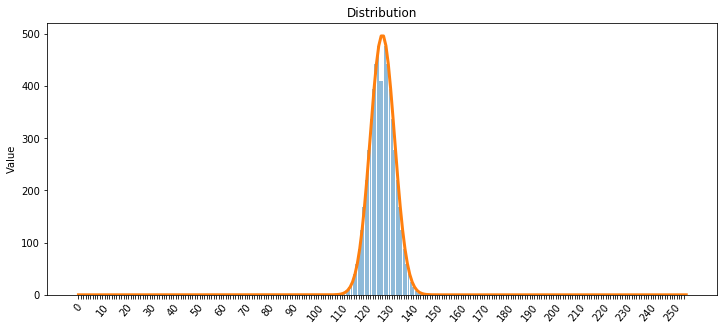

In [29]:
plot_symbol_dist(data_new, x, y)

Validation:

In [30]:
# Difference between distributions
print('Diff:', total - sum(data_new))

Diff: 0


---
<a href="https://ansegura7.github.io/Algorithms/">« Home</a>